# Quick Start

If you have not installed ``Triumvirate`` already, please follow the
instructions in ['Installation'](../installation.rst) first.

## Using the Python package

### Configure parameters

``Triumvirate`` uses the {py:class}`~triumvirate.parameters.ParameterSet` class
to configure parameters.

In [1]:
from triumvirate.parameters import ParameterSet

The simplest way to initialise a parameter set is via an external ``.yml`` file.
You can obtain a template file as below.

In [2]:
from triumvirate.parameters import fetch_paramset_template

paramset_template = fetch_paramset_template('text')

Note that parameters in the template file, especially directory/file paths,
may need to be modified accordingly. Here as a demostration, we obtain
a parameter set as a template {py:class}`dict` instead:

In [3]:
paramset_template = fetch_paramset_template('dict')

Let's load the most used classes and functions first:

In [ ]:
from triumvirate.catalogue import ParticleCatalogue

Load the relevant modules for setting up the measurement parameters, loading
the catalogues and making the desired measurement with the choice of a logger.

In [1]:
import os
from pathlib import Path

from triumvirate.catalogue import ParticleCatalogue
from triumvirate.logger import setup_logger
from triumvirate.parameters import ParameterSet
from triumvirate.twopt import compute_powspec, compute_powspec_in_gpp_box
from triumvirate.threept import compute_bispec, compute_bispec_in_gpp_box

In [2]:
os.chdir(os.getcwd() + "/../../..")

## Set-up

Set up logger.

In [3]:
logger = setup_logger()

Load parameter file.

In [4]:
# NOTE: See the parameter file used here for details.
PARAMETER_FILEPATH = "triumvirate/tests/test_input/params/test_params.yml"  # change path as necessary

pars = ParameterSet(PARAMETER_FILEPATH, logger=logger)

[2022-11-02 14:24:42 (+0:00:00) INFO] (C++ start) Validating parameters...
[2022-11-02 14:24:42 (+0:00:00) INFO] (C++ end) ... validated parameters.


## Data I/O

Load catalogues.

In [5]:
cat_data = ParticleCatalogue.read_from_file(
    "{}/{}".format(
        pars['directories']['catalogues'],
        pars['files']['data_catalogue']
    ),
    names=['x', 'y', 'z', 'ws'],  # change as necessary
    logger=logger
)
if pars['catalogue_type'] != 'sim':
    cat_rand = ParticleCatalogue.read_from_file(
        "{}/{}".format(
            pars['directories']['catalogues'],
            pars['files']['rand_catalogue']
        ),
        names=['x', 'y', 'z', 'nz', 'ws'],  # change as necessary
        logger=logger
    )

[2022-11-02 14:24:43 (+0:00:01) WARNING] Catalogue 'nz' field is not provided and thus set to zero, which may raise errors in some computations. (/home/mikesw/Documents/Bispec/Triumvirate/triumvirate/catalogue.py:203:UserWarning --> "warnings.warn(")
[2022-11-02 14:24:43 (+0:00:01) WARNING] Catalogue 'wc' field is not provided, so is set to unity. (/home/mikesw/Documents/Bispec/Triumvirate/triumvirate/catalogue.py:210:UserWarning --> "warnings.warn(")
[2022-11-02 14:24:43 (+0:00:01) INFO] Original extents of particle coordinates: {'x': (0.00018049031496047974, 999.999755859375), 'y': (5.09379715367686e-05, 999.9984130859375), 'z': (0.004449330735951662, 999.9979248046875)} (ParticleCatalogue(source=extfile:triumvirate/tests/test_input/catalogues/test_catalogue_sim.dat)).
[2022-11-02 14:24:43 (+0:00:01) INFO] Catalogue loaded: 999907 particles with total systematic weights 999907.000 (ParticleCatalogue(source=extfile:triumvirate/tests/test_input/catalogues/test_catalogue_sim.dat)).


## Measurements

Measure the power spectrum.

In [6]:
if pars['catalogue_type'] != 'sim':
    measurements_pk = compute_powspec(
        cat_data, cat_rand, paramset=pars,
        save='.txt',  # save measurements to '.txt' file
        logger=logger
    )
else:
    measurements_pk = compute_powspec_in_gpp_box(
        cat_data, paramset=pars,
        save='.txt',  # save measurements to '.txt' file
        logger=logger
    )

[2022-11-02 14:24:43 (+0:00:01) INFO] Parameter set have been initialised.
[2022-11-02 14:24:43 (+0:00:01) INFO] Binning has been initialised.
[2022-11-02 14:24:44 (+0:00:01) INFO] Offset extents of particle coordinates: {'x': (0.00018049031496047974, 999.999755859375), 'y': (5.09379715367686e-05, 999.9984130859375), 'z': (0.004449330735951662, 999.9979248046875)} (ParticleCatalogue(source=extfile:triumvirate/tests/test_input/catalogues/test_catalogue_sim.dat)).
[2022-11-02 14:24:44 (+0:00:01) INFO] Catalogue box has been periodised.
[2022-11-02 14:24:44 (+0:00:01) INFO] Inserted missing 'nz' field based on particle count and boxsize.
[2022-11-02 14:24:44 (+0:00:01) INFO] (C++ start) Preparing catalogue for clustering algorithm...
[2022-11-02 14:24:45 (+0:00:02) INFO] (C++ end) ... prepared catalogue for clustering algorithm.
[2022-11-02 14:24:46 (+0:00:03) INFO] Normalisation factors: 1.000186e-03 (used), 7.623899e-05 (alternative).
[2022-11-02 14:24:46 (+0:00:03) INFO] (C++ start) Me

Visualise the measurements.

In [7]:
k = measurements_pk['keff']
pk0 = (measurements_pk['pk_raw'] - measurements_pk['pk_shot']).real

Text(0, 0.5, '$k P_0(k)$')

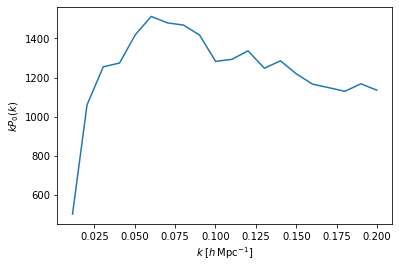

In [8]:
import matplotlib.pyplot as plt

plt.plot(k, k * pk0)
plt.xlabel(r"$k$ [$h\,\mathrm{Mpc}^{-1}$]")
plt.ylabel(r"$k P_0(k)$")

If you have turned on `save=<...>`, you can view the output measurement file (here displayed below):

In [9]:
with open("triumvirate/tests/test_output/pk0_jnote.txt", 'r') as measurement_file:
    measurement_fstream = measurement_file.readlines()
    print("".join(measurement_fstream))

# Catalogue source: extfile:triumvirate/tests/test_input/catalogues/test_catalogue_sim.dat
# Catalogue size: 999907 particles of total weight 999907.000
# Catalogue particle extents: ([0.000, 1000.000], [0.000, 999.998], [0.004, 999.998])
# Box size: (1000.000, 1000.000, 1000.000)
# Box alignment: centre
# Mesh number: (256, 256, 256)
# Mesh assignment and interlacing: cic, false
# Normalisation factor: 1.000186e-03 (particle-based, used), 7.623899e-05 (mesh-based, alternative)
# [0] k_cen, [1] k_eff, [2] nmodes, [3] Re{pk0_raw}, [4] Im{pk0_raw}, [5] Re{pk0_shot}, [6] Im{pk0_shot}
1.000000000e-02	1.149964290e-02	5.600000000e+01	4.454522927e+04	0.000000000e+00	1.000093009e+03	0.000000000e+00
2.000000000e-02	2.047114034e-02	1.940000000e+02	5.275358886e+04	0.000000000e+00	1.000093009e+03	0.000000000e+00
3.000000000e-02	3.052421724e-02	4.880000000e+02	4.210557214e+04	0.000000000e+00	1.000093009e+03	0.000000000e+00
4.000000000e-02	4.062536317e-02	8.120000000e+02	3.236776854e+04	0.000000000e